## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Івасюк Михайло (Алгоритм Гаффмана, LZW)
- Коваль Вікторія (LZ77)

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [3]:
class Huffman:
    main_dict = {}
    def generate_code(self, node: 'Node', coding):
        if node.char is not None:
            char = node.char
            code = coding
            self.main_dict[char] = code
        else:
            self.generate_code(node.left_child, coding + '0')
            self.generate_code(node.right_child, coding + '1')

    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        frequency = self.frequency(text)
        nodes = []
        for (char, freq) in frequency:
            nodes.append(Node(freq, char))   
        while len(nodes) > 1:
            first_lowest = nodes[0]
            second_lowest = nodes[1]
            min_freq = nodes.pop(0).freq + nodes.pop(0).freq
            new_node = Node(min_freq)
            new_node.left_child = first_lowest
            new_node.right_child = second_lowest
            nodes.append(new_node)
            nodes = sorted(nodes, key= lambda x: x.freq)
        self.generate_code(nodes[0], '')
        coded_str = ''
        for i in text:
            coded_str += self.main_dict[i]
        return (coded_str, self.main_dict)    
    def frequency(self, text):
        freq = {}
        for char in text:
            if char not in freq:
                freq[char] = 1
            else:
                freq[char] += 1
        return sorted(freq.items(), key= lambda x: x[1])
    
    def decode(self, code: str, coding_dict: dict[str, str]):
        decoded_str = ""
        coding_dict = {i : j for j, i in coding_dict.items()}
        while code:
            for cd in coding_dict:
                if code.startswith(cd):
                    decoded_str += coding_dict[cd]
                    code = code[len(cd):]
        return decoded_str


class Node:
    def __init__(self, freq, char = None) -> None:
        self.char = char
        self.freq = freq
        self.left_child = None
        self.right_child = None
    def __repr__(self) -> str:
        return f'("{self.char}", {self.freq})'
    
text = 'In computer science and information theory, a Huffman code is a particular type of optimal prefix code that is commonly used for lossless data compression.'
huffman = Huffman()
encoded = huffman.encode(text)
print('------------------------')
print(f'Given text: "{text}"')
print(f'Encoded text: {encoded[0]}')
print(f'Dict: {encoded[1]}')
print('------------------------')
decoded = huffman.decode(encoded[0], encoded[1])
print(f'Decoded text: "{decoded}"')
print(f'Given text == decoded(encoded(text)) : {text == decoded}')


------------------------
Given text: "In computer science and information theory, a Huffman code is a particular type of optimal prefix code that is commonly used for lossless data compression."
Encoded text: 010110000101100011000111111110001010011010100100110100000110111101000100011101011010110010100101100111001011101000010011111101101100111000001011001101111011101000001001111000101101110101111001011100101011101111011111110110010110001100010010101011001111000110101111011100101101000110011100110101010011101101001100110111100111001010110000111011100001110001100111111111011100111101110001001010111010111010111111000110001001010101100110111101110110110110011110001100011000111111111100000101001111110011001010100010101001011011101000010011010011000100010001001110101000100011010010101101101011110001100011111111000100101010001000011100000101111010
Dict: {'o': '000', 'n': '0010', 'c': '0011', 'r': '0100', 'u': '01010', 'I': '0101100', ',': '0101101', 'H': '0101110', 'x': '0101111', 't': '0110',

------------------------------------------------------------------------------------------------------------------------------------------------


# Графік роботи відносно розміру вхідних даних, Гаффман


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import string

100%|██████████| 10/10 [00:00<00:00, 256.38it/s]


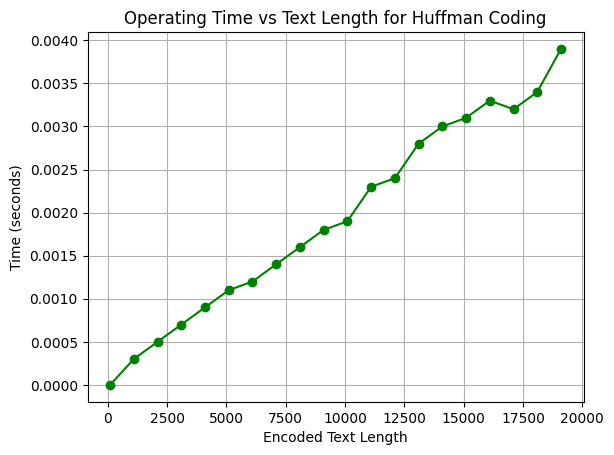

In [5]:

NUM_OF_ITERATIONS = 10
texts = []
mean_time = []
len_text = []

def create_random_str(ran):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(ran))

for ln in range(100, 20000, 1000):
    rand_str = create_random_str(ln)
    texts.append(rand_str)
    len_text.append(len(rand_str))

def huffman_time(text):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        start = time.time()
        huffman_encode = Huffman().encode(text)
        end = time.time()
        execution_times.append(end - start)

    return np.mean(execution_times)

for text in texts:
    mean_time.append(huffman_time(text))

plt.plot(len_text, mean_time, marker='o', color='green')
plt.title('Operating Time vs Text Length for Huffman Coding')
plt.xlabel('Encoded Text Length')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()



-----------------------------------------------------------------------------------------------------------------------------------------

# Ступінь стиснення відносно розміру вхідних даних (у відсотках), Гаффман

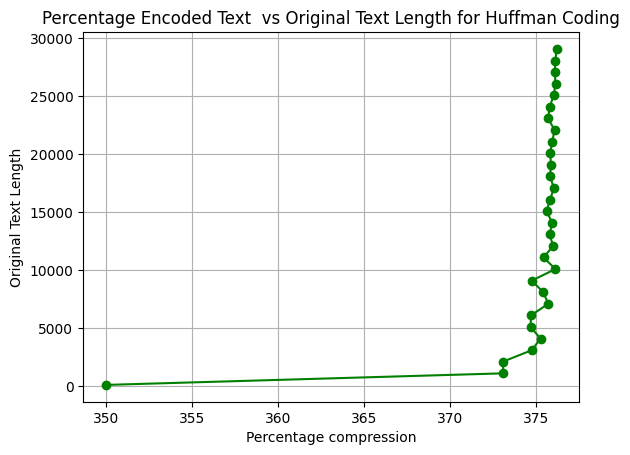

In [72]:
texts = []
len_text_in_percentage = []

def create_random_str(ran):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(ran))

for ln in range(100, 30000, 1000):
    rand_str = create_random_str(ln)
    texts.append(rand_str)

def calculate_percentage(text):
    huffman_encode = Huffman().encode(text)
    len_text_in_percentage.append((((len(huffman_encode[0]) * 100) / len(text))) - 100)

for text in texts:
    calculate_percentage(text)
texts = [len(i) for i in texts]
plt.plot(len_text_in_percentage, texts, marker='o', color='green')
plt.title('Percentage Encoded Text  vs Original Text Length for Huffman Coding')
plt.xlabel('Percentage compression')
plt.ylabel('Original Text Length')
plt.grid(True)
plt.show()



-----------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------

# Алгоритм LZW

In [6]:
import copy
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        encoded_stringa = []
        start_dict = {}
        num = 1
        for char in text:
            if char not in start_dict:
                start_dict[char] = num
                num += 1
        stringa = ''
        dict_use = copy.deepcopy(start_dict)
        for ind, char in enumerate(text):
            stringa += char
            if ind == len(text) - 1:
                encoded_stringa.append((dict_use[stringa]))
                return [encoded_stringa, start_dict]
            new_str = stringa + text[ind + 1]
            if new_str not in dict_use:
                dict_use[new_str] = num
                num += 1
                encoded_stringa.append((dict_use[stringa]))
                stringa = ''
    def decode(self, code: str, coding_dict: list) -> str:
        decoded_text = ''
        last_num = list(coding_dict.values())[-1] + 1
        string = ''
        for indx, num in enumerate(code):
                if num not in list(coding_dict.values()):
                    coding_dict[string + string[0]] = num
                decoded_text += str(list(coding_dict.keys())[list(coding_dict.values()).index(num)])
                if len(string) != 0:
                    coding_dict[string + ((list(coding_dict.keys())[list(coding_dict.values()).index(num)])[0])] = last_num
                    last_num += 1
                string = list(coding_dict.keys())[list(coding_dict.values()).index(num)]
        return decoded_text


with open('test_algo_zip.txt', 'r', encoding='UTF-8') as file:
    text = file.readlines()[0]
lzw_algo = LZW()
encoded_text, start_dict = lzw_algo.encode(text)[0], lzw_algo.encode(text)[1]
print('-----------------------')
print(f'Encoded lzw = {encoded_text}')
print(f'Len of encoded lzw: {len(encoded_text)}')
print(f'Len of given text: {len(text)}')
print('-----------------------')
decoded = lzw_algo.decode(encoded_text, start_dict)
print(f'Given text: {text}')
print(f'Decoded code by LZW: {decoded}')
print(f'text == decoded: {text == decoded}')
print('-----------------------')


-----------------------
Encoded lzw = [1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 6, 10, 50, 11, 12, 13, 14, 1, 7, 10, 15, 13, 8, 16, 13, 17, 13, 18, 19, 54, 2, 20, 16, 17, 5, 13, 5, 21, 16, 16, 5, 2, 84, 13, 22, 17, 23, 71, 11, 21, 48, 20, 87, 16, 8, 21, 19, 70, 5, 24, 21, 20, 8, 23, 12, 3, 13, 11, 97, 91, 2, 22, 13, 25, 26, 13, 27, 25, 20, 17, 12, 17, 111, 46, 48, 50, 28, 13, 29, 17, 94, 25, 13, 53, 9, 132, 17, 19, 117, 30, 76, 20, 120, 57, 5, 59, 31, 13, 32, 23, 13, 33, 17, 69, 4, 18, 25, 5, 68, 12, 116, 118, 148, 58, 60, 8, 102, 34, 35, 36, 37, 70, 69, 142, 67, 96, 21, 9, 166, 8, 48, 86, 3, 2, 19, 92, 23, 100, 102, 21, 38, 13, 109, 2, 13, 63, 39, 36, 103, 105, 107, 109, 111, 160, 162, 164, 166, 119, 200, 47, 49, 80, 142, 117, 139, 67, 172, 35, 202, 152, 30, 165, 204, 106, 108, 110, 67, 69, 99, 186, 199, 23, 21, 180, 4, 187, 189, 155, 218, 13, 126, 69, 198, 13, 4, 21, 23, 242, 8, 79, 13, 38, 106, 13, 183, 147, 245, 8, 24, 60, 109, 20, 21, 18, 264, 160, 155, 171, 245, 17, 20, 22, 157, 97, 239, 24

-----------------------------------------------------------------------------------------------------------------------------------------

# Графік роботи відносно розміру вхідних даних, LZW


100%|██████████| 10/10 [00:00<00:00, 158.72it/s]


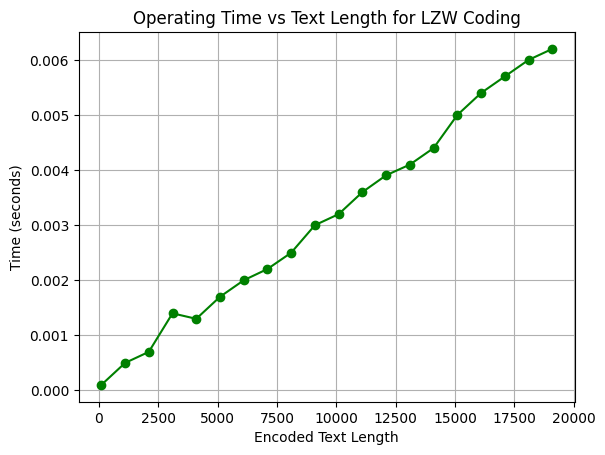

In [7]:

NUM_OF_ITERATIONS = 10
texts = []
mean_time = []
len_text = []

def create_random_str(ran):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(ran))

for ln in range(100, 20000, 1000):
    rand_str = create_random_str(ln)
    texts.append(rand_str)
    len_text.append(len(rand_str))

def lzw_time(text):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        start = time.time()
        lzw_algo = LZW().encode(text)[0]
        end = time.time()
        execution_times.append(end - start)

    return np.mean(execution_times)

for text in texts:
    mean_time.append(lzw_time(text))

plt.plot(len_text, mean_time, marker='o', color='green')
plt.title('Operating Time vs Text Length for LZW Coding')
plt.xlabel('Encoded Text Length')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()



-----------------------------------------------------------------------------------------------------------------------------------------

# Ступінь стиснення відносно розміру вхідних даних (у відсотках), LZW

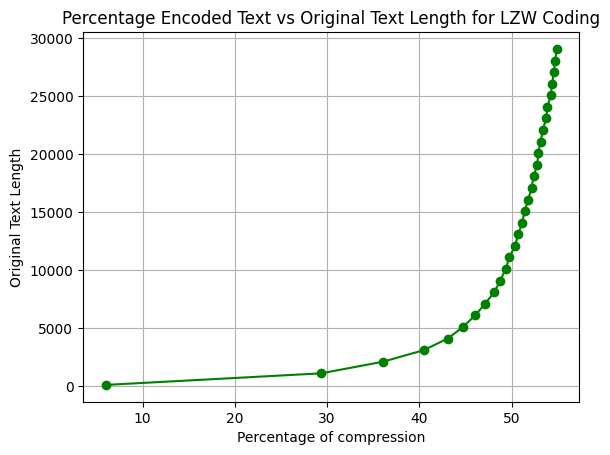

In [61]:
texts = []
len_text_in_percentage = []

def create_random_str(ran):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(ran))

for ln in range(100, 30000, 1000):
    rand_str = create_random_str(ln)
    texts.append(rand_str)

def calculate_percentage(text):
    lzw_encode = LZW().encode(text)
    len_text_in_percentage.append((100 - ((len(lzw_encode[0]) * 100) / len(text))))

for text in texts:
    calculate_percentage(text)
texts = [len(i) for i in texts]
plt.plot(len_text_in_percentage, texts, marker='o', color='green')
plt.title('Percentage Encoded Text vs Original Text Length for LZW Coding')
plt.xlabel('Percentage of compression')
plt.ylabel('Original Text Length')
plt.grid(True)
plt.show()



-----------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [78]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size=buffer_size
    def _text2list(self,text1):
        return list(text1)
    def _list2text(self,lst):
        return ''.join(lst)
    def encode(self, text: str) -> str:
        lst=self._text2list(text)
        compressed = []
        index = 0
        while index < len(lst):
            best_offset = -1
            best_length = -1
            best_match = ''
            for length in range(1, min(len(lst) - index, self.buffer_size)):
                in_set=lst[index:index + length]
                in_set_str=self._list2text(in_set)
                lst_new_str=self._list2text(lst)
                offset=lst_new_str.rfind(in_set_str,max(0, index - self.buffer_size), index)

                if offset != -1 and length > best_length:
                    best_offset = index - offset
                    best_length = length
                    best_match = in_set
            if best_match:
                compressed.append((best_offset, best_length, lst[index + best_length]))
                index += best_length + 1
            else:
                compressed.append((0, 0, lst[index]))
                index += 1
        return compressed 
    def decode(self, code: str) -> str:
        decompressed = []
        for item in code:
            offset=item[0]
            length=item[1]
            next1 = item[2]
            if length == 0:
                decompressed.append(next1)
            else:
                start = len(decompressed) - offset
                in_set= decompressed[start:start + length]
                decompressed.extend(in_set)
                decompressed.append(next1)
        return self._list2text(decompressed)

text = 'LZ77 and LZ78, the Lempel-Ziv algorithm, is a universal lossless data compression algorithm created in 1977-1978 by Abraham Lempel and Jacob Ziv. The algorithm is designed to be quick to implement, but it is not necessarily optimal because it does not perform any analysis of the input data. In 1984, Terry Welch published an improved implementation of the LZ78 algorithm, the Lempel-Ziv-Welch algorithm (LZW).'
print('-----------------------')
print(f'Text: {text}')
print('-----------------------')
lz77 = LZ77(5)
print(f'Encoded: {lz77.encode(text)}')
print('-----------------------')
print(f'Decoded text: {lz77.decode(lz77.encode(text))}')
print(f'Encoded text == decoded text: {text == lz77.decode(lz77.encode(text))}')

-----------------------
Text: LZ77 and LZ78, the Lempel-Ziv algorithm, is a universal lossless data compression algorithm created in 1977-1978 by Abraham Lempel and Jacob Ziv. The algorithm is designed to be quick to implement, but it is not necessarily optimal because it does not perform any analysis of the input data. In 1984, Terry Welch published an improved implementation of the LZ78 algorithm, the Lempel-Ziv-Welch algorithm (LZW).
-----------------------
Encoded: [(0, 0, 'L'), (0, 0, 'Z'), (0, 0, '7'), (1, 1, ' '), (0, 0, 'a'), (0, 0, 'n'), (0, 0, 'd'), (4, 1, 'L'), (0, 0, 'Z'), (0, 0, '7'), (0, 0, '8'), (0, 0, ','), (0, 0, ' '), (0, 0, 't'), (0, 0, 'h'), (0, 0, 'e'), (4, 1, 'L'), (3, 1, 'm'), (0, 0, 'p'), (3, 1, 'l'), (0, 0, '-'), (0, 0, 'Z'), (0, 0, 'i'), (0, 0, 'v'), (0, 0, ' '), (0, 0, 'a'), (0, 0, 'l'), (0, 0, 'g'), (0, 0, 'o'), (0, 0, 'r'), (0, 0, 'i'), (0, 0, 't'), (0, 0, 'h'), (0, 0, 'm'), (0, 0, ','), (0, 0, ' '), (0, 0, 'i'), (0, 0, 's'), (3, 1, 'a'), (2, 1, 'u'), (0, 0

-----------------------------------------------------------------------------------------------------------------------------------------

# Графік роботи відносно розміру вхідних даних, LZ77

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.02it/s]


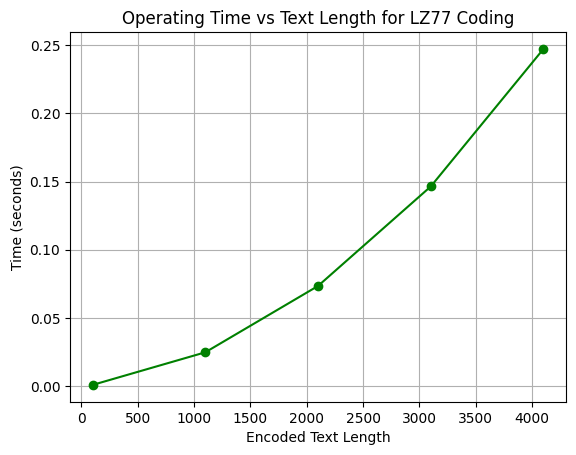

In [75]:
NUM_OF_ITERATIONS = 10
texts = []
mean_time = []
len_text = []

def create_random_str(ran):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(ran))

for ln in range(100, 5000, 1000):
    rand_str = create_random_str(ln)
    texts.append(rand_str)
    len_text.append(len(rand_str))

def lz77_time(text):
    execution_times = []
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        start = time.time()
        lz77_algo = LZ77(5).encode(text)[0]
        end = time.time()
        execution_times.append(end - start)

    return np.mean(execution_times)

for text in texts:
    mean_time.append(lz77_time(text))

plt.plot(len_text, mean_time, marker='o', color='green')
plt.title('Operating Time vs Text Length for LZ77 Coding')
plt.xlabel('Encoded Text Length')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Ступінь стиснення відносно розміру вхідних даних (у відсотках), LZ77

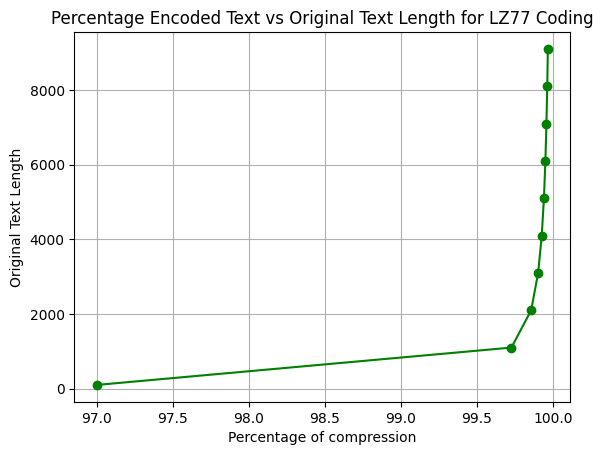

In [77]:
texts = []
len_text_in_percentage = []

def create_random_str(ran):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(ran))

for ln in range(100, 10000, 1000):
    rand_str = create_random_str(ln)
    texts.append(rand_str)

def calculate_percentage(text):
    lz77_encode = LZ77(7).encode(text)
    len_text_in_percentage.append((100 - ((len(lz77_encode[0]) * 100) / len(text))))

for text in texts:
    calculate_percentage(text)
texts = [len(i) for i in texts]
plt.plot(len_text_in_percentage, texts, marker='o', color='green')
plt.title('Percentage Encoded Text vs Original Text Length for LZ77 Coding')
plt.xlabel('Percentage of compression')
plt.ylabel('Original Text Length')
plt.grid(True)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass